# Analysis of the 2025 Stack Overflow Annual Developer Survey: Data Science Career Outlook

## Section 1: Business Understanding

In this notebook, I analyze the 2025 Stack Overflow Annual Developer Survey data with the goal of answering the following questions:
1. Is AI a threat to Data Science or Data Analysis jobs?
2. What factors are correlated with workers' view of the perceived or real threat?
3. What skills will be most necessary for data scientists and data analysts in the future?

First, install and import the necessary packages.

In [2]:
#The three lines below are necessary to make sure the TrueType font for wordcloud is installed.
!pip install --upgrade pip 
!pip install --upgrade Pillow
!pip install freetype-py

!pip install wordcloud
!pip install -U scikit-learn

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\sky_a\anaconda3\lib\site-packages

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\sky_a\anaconda3\lib\site-packages

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\sky_a\anaconda3\lib\site-packages

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\sky_a\anaconda3\lib\site-packages

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\sky_a\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\sky_a\anaconda3\lib\site-packages

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import textwrap

## Section 2: Data Understanding

Load and explore the data.

In [2]:
#load the survey results
df_results = pd.read_csv('Data/2025_survey_results_public.csv')
df_results.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [3]:
#load the schema
df_schema = pd.read_csv('Data/2025_survey_results_schema.csv')
df_schema.head()

,qid,qname,question,type,sub,sq_id
0,QID18,TechEndorse_1,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0
1,QID18,TechEndorse_2,What attracts you to a technology or causes yo...,RO,Easy-to-use API,2.0
2,QID18,TechEndorse_3,What attracts you to a technology or causes yo...,RO,Robust and complete API,3.0
3,QID18,TechEndorse_4,What attracts you to a technology or causes yo...,RO,Customizable and manageable codebase,4.0
4,QID18,TechEndorse_5,What attracts you to a technology or causes yo...,RO,Reputation for quality,5.0


In [4]:
df_results.shape

(49123, 170)

In [5]:
df_results.columns.values

array(['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment',
       'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode',
       'LearnCodeAI', 'AILearnHow', 'YearsCode', 'DevType', 'OrgSize',
       'ICorPM', 'RemoteWork', 'PurchaseInfluence', 'TechEndorseIntro',
       'TechEndorse_1', 'TechEndorse_2', 'TechEndorse_3', 'TechEndorse_4',
       'TechEndorse_5', 'TechEndorse_6', 'TechEndorse_7', 'TechEndorse_8',
       'TechEndorse_9', 'TechEndorse_13', 'TechEndorse_13_TEXT',
       'TechOppose_1', 'TechOppose_2', 'TechOppose_3', 'TechOppose_5',
       'TechOppose_7', 'TechOppose_9', 'TechOppose_11', 'TechOppose_13',
       'TechOppose_16', 'TechOppose_15', 'TechOppose_15_TEXT', 'Industry',
       'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5',
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8',
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11',
       'JobSatPoints_13', 'JobSatPoints_14', 'JobSatPoints_15',
       'JobSatPoints_16', 'JobSatPoints

## Section 3: Data Preparation

In [6]:
#view the columns that will be used to answer the first question
df_results[['DevType','AIThreat']]

,DevType,AIThreat
0,"Developer, mobile",I'm not sure
1,"Developer, back-end",I'm not sure
2,"Developer, front-end",No
3,"Developer, back-end",No
4,Engineering manager,No
...,...,...
49118,"Developer, full-stack",I'm not sure
49119,"Developer, full-stack",NaN
49120,NaN,NaN
49121,"Developer, full-stack",No


Remove responses in which 'DevType' is NaN, as those will not be useful in any of the analyses. All analyses rely on associating each row of data with a developer type.

In [7]:
df_results.dropna(subset=['DevType'], inplace=True)
df_results.reset_index(drop=True, inplace=True)
df_results['DevType']

0            Developer, mobile
1          Developer, back-end
2         Developer, front-end
3          Developer, back-end
4          Engineering manager
                 ...          
43631      Engineering manager
43632    Developer, full-stack
43633    Developer, full-stack
43634    Developer, full-stack
43635    Developer, full-stack
Name: DevType, Length: 43636, dtype: object

 Now filter the results to only include responses from people who are currently employed, working as independent contractors or freelancers, or are self-employed. The assumption here is that people in these categories of employment will have a better sense of the impact of AI than those who are not employed, retired, or students.

In [8]:
df_results_employed = df_results[df_results['Employment'].isin(['Employed', 'Independent contractor, freelancer, or self-employed'])]
df_results_employed

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43631,49116,"I used to be a developer by profession, but no...",45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,Volunteering (regularly),20.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43632,49119,I am a developer by profession,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,NaN,9.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools req...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
43633,49120,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,"Caring for dependents (children, elderly, etc.)",13.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools req...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43634,49122,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,None of the above;Engaged in paid work (20-29 ...,10.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


Now filter the survey results to only include responses from data scientists and data or business analysts. This is needed because the second and third questions only pertain to data scientists and data or business analysts.

In [9]:
df_results_scientists_analysts = df_results_employed[df_results_employed['DevType'].isin(['Data scientist', 'Data or business analyst'])]
df_results_scientists_analysts['DevType']

170                Data scientist
223      Data or business analyst
236                Data scientist
250      Data or business analyst
411                Data scientist
                   ...           
43494              Data scientist
43515              Data scientist
43591    Data or business analyst
43606    Data or business analyst
43628    Data or business analyst
Name: DevType, Length: 801, dtype: object

To answer the second business question, I will train a model to predict an individual's answer to the question "Do you believe AI is a threat to your current job?" based on their answers to some of the other questions in the survey. Then I will look at which of the  questions used in the model most strongly influence the model's prediction.  
  
I need to select only a subset of the questions, because the survey is long and having many features with a small number of samples increases the chances of overfitting. I chose the questions to be used in the predictive model based on my perceived likelihood of a correlation between a person's response and their perception of the threat of AI. I recognize that this is subjective. I also slected the questions to avoid multicollinearity. For example, age was selected to be part of the model and consequenetly a respondent's years of professional work experience was not included. The list of questions selected is below.
- What is your age?
- Which of the following best describes the highest level of formal education that you’ve completed?
- Which of the following describes your current job or the job you had for the most time in the past year?
- Did you spend time in the last year learning AI programming or AI-enabled tooling on your own or at work?
- Are you an individual contributor or people manager?
- Which best describes your current work situation? Note that the answer choices for this question relate to whether they work remotely,in-person, or hybrid.
- What industry do you work for in?
- Where do you live?
- Do you currently use AI tools in your development process?
- How favorable is your stance on using AI tools as part of your development workflow?

In [10]:
#First get the question names for the questions
question_names = df_schema[['qname', 'question']]
questions = [
    'What is your age?', 
    'Which of the following best describes the highest level of formal education that you’ve completed? ',
    'Which of the following describes your current job or the job you had for the most time in the past year?',
    'Did you spend time in the last year learning AI programming or AI-enabled tooling on your own or at work?',
    'Are you an individual contributor or people manager?',
    'Which best describes your current work situation?',
    'What industry do you work for in?',
    'Where do you live?',
    'Do you currently use AI tools in your development process?',
    'How favorable is your stance on using AI tools as part of your development workflow?',
    'Do you believe AI is a threat to your current job?'
]
model_question_names = question_names[question_names['question'].isin(questions)]
model_question_names

,qname,question
50,Age,What is your age?
51,EdLevel,Which of the following best describes the high...
57,LearnCodeAI,Did you spend time in the last year learning A...
60,DevType,Which of the following describes your current ...
62,ICorPM,Are you an individual contributor or people ma...
63,RemoteWork,Which best describes your current work situation?
66,Industry,What industry do you work for in?
68,AIThreat,Do you believe AI is a threat to your current ...
72,Country,Where do you live?
116,AISelect,Do you currently use AI tools in your developm...


In [11]:
#filter the data to only include the questions that will be used in the model
model_data = df_results_scientists_analysts[model_question_names['qname']].reset_index(drop=True)
model_data

,Age,EdLevel,LearnCodeAI,DevType,ICorPM,RemoteWork,Industry,AIThreat,Country,AISelect,AISent
0,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Yes, I learned how to use AI-enabled tools for...",Data scientist,Individual contributor,Remote,"Internet, Telecomm or Information Services",Yes,Costa Rica,"Yes, I use AI tools daily",Favorable
1,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","No, I learned something that was not related t...",Data or business analyst,People manager,"Hybrid (some remote, leans heavy to in-person)",Software Development,No,Finland,"No, and I don't plan to",Very unfavorable
2,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Yes, I learned how to use AI-enabled tools for...",Data scientist,Individual contributor,Remote,Software Development,No,Switzerland,"Yes, I use AI tools daily",Very favorable
3,25-34 years old,Some college/university study without earning ...,"No, I learned something that was not related t...",Data or business analyst,Individual contributor,In-person,Manufacturing,No,United States of America,"No, but I plan to soon",Indifferent
4,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Yes, I learned how to use AI-enabled tools for...",Data scientist,NaN,NaN,Software Development,No,Argentina,"Yes, I use AI tools monthly or infrequently",Unfavorable
...,...,...,...,...,...,...,...,...,...,...,...
796,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Yes, I learned how to use AI-enabled tools req...",Data scientist,NaN,NaN,Software Development,No,India,"Yes, I use AI tools daily",Very favorable
797,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Yes, I learned how to use AI-enabled tools req...",Data scientist,Individual contributor,Remote,"Transportation, or Supply Chain",No,Hungary,"Yes, I use AI tools weekly",Favorable
798,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Yes, I learned how to use AI-enabled tools req...",Data or business analyst,Individual contributor,Remote,Healthcare,No,Philippines,"Yes, I use AI tools daily",Very favorable
799,18-24 years old,"Secondary school (e.g. American high school, G...","No, I learned something that was not related t...",Data or business analyst,Individual contributor,In-person,Other:,Yes,Brazil,NaN,NaN


Now remove the rows that don't contain a value for for the target value. Without a target value, the row is not useful for training the model.

In [12]:
#Check for NaN values
model_data.isna().sum()

Age              0
EdLevel          3
LearnCodeAI      6
DevType          0
ICorPM          84
RemoteWork      77
Industry        96
AIThreat       116
Country        139
AISelect       174
AISent         173
dtype: int64

Drop rows that contain NaN for the target value (the AIThreat column).

In [13]:
model_data.dropna(subset=['AIThreat'], inplace=True)
model_data.isna().sum()

Age             0
EdLevel         2
LearnCodeAI     2
DevType         0
ICorPM         64
RemoteWork     58
Industry        4
AIThreat        0
Country        26
AISelect       59
AISent         59
dtype: int64

In [14]:
model_data.describe()

,Age,EdLevel,LearnCodeAI,DevType,ICorPM,RemoteWork,Industry,AIThreat,Country,AISelect,AISent
count,685,683,683,685,621,627,681,685,659,626,626
unique,7,8,5,2,2,5,15,3,72,5,6
top,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Yes, I learned how to use AI-enabled tools req...",Data scientist,Individual contributor,"Hybrid (some remote, leans heavy to in-person)",Software Development,No,United States of America,"Yes, I use AI tools daily",Favorable
freq,258,301,296,437,539,151,120,438,158,294,237


Of note, of the 685 people in the data set, 437 are data scientists and 539 are individual contributors. Only 158 are from the US, and only 294--fewer than half--use AI tools daily.

Encode categorical variables to prepare for developing a model. This is necessary before training a RandomForestClassifier.

In [16]:
#Encode ordinal variables
age_order = ['Under 18 years old', 
             '18-24 years old', 
             '25-34 years old', 
             '35-44 years old', 
             '45-54 years old', 
             '55-64 years old',
             '65 years or older',
             'Prefer not to say']
ed_level_order = ['Primary/elementary school', 
                  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                  'Some college/university study without earning a degree',
                  'Associate degree (A.A., A.S., etc.)',
                  'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                  'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                  'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
                  'Other (please specify):']
encoder = OrdinalEncoder(categories=[age_order, ed_level_order], handle_unknown='use_encoded_value', unknown_value=np.nan, encoded_missing_value=np.nan, dtype=float)
model_data_encoded = model_data.copy()
model_data_encoded[['Age', 'EdLevel']] = encoder.fit_transform(model_data[['Age', 'EdLevel']])
model_data_encoded

,Age,EdLevel,LearnCodeAI,DevType,ICorPM,RemoteWork,Industry,AIThreat,Country,AISelect,AISent
0,3.0,4.0,"Yes, I learned how to use AI-enabled tools for...",Data scientist,Individual contributor,Remote,"Internet, Telecomm or Information Services",Yes,Costa Rica,"Yes, I use AI tools daily",Favorable
1,3.0,5.0,"No, I learned something that was not related t...",Data or business analyst,People manager,"Hybrid (some remote, leans heavy to in-person)",Software Development,No,Finland,"No, and I don't plan to",Very unfavorable
2,2.0,4.0,"Yes, I learned how to use AI-enabled tools for...",Data scientist,Individual contributor,Remote,Software Development,No,Switzerland,"Yes, I use AI tools daily",Very favorable
3,2.0,2.0,"No, I learned something that was not related t...",Data or business analyst,Individual contributor,In-person,Manufacturing,No,United States of America,"No, but I plan to soon",Indifferent
4,4.0,5.0,"Yes, I learned how to use AI-enabled tools for...",Data scientist,NaN,NaN,Software Development,No,Argentina,"Yes, I use AI tools monthly or infrequently",Unfavorable
...,...,...,...,...,...,...,...,...,...,...,...
794,3.0,6.0,"Yes, I learned how to use AI-enabled tools req...",Data scientist,People manager,"Hybrid (some remote, leans heavy to in-person)",Healthcare,No,Germany,NaN,NaN
796,2.0,4.0,"Yes, I learned how to use AI-enabled tools req...",Data scientist,NaN,NaN,Software Development,No,India,"Yes, I use AI tools daily",Very favorable
797,4.0,5.0,"Yes, I learned how to use AI-enabled tools req...",Data scientist,Individual contributor,Remote,"Transportation, or Supply Chain",No,Hungary,"Yes, I use AI tools weekly",Favorable
798,2.0,4.0,"Yes, I learned how to use AI-enabled tools req...",Data or business analyst,Individual contributor,Remote,Healthcare,No,Philippines,"Yes, I use AI tools daily",Very favorable


In [17]:
target = model_data_encoded['AIThreat']
df_dummies = model_data_encoded.drop(columns=['AIThreat'])#don't encode the target column
df_dummies = pd.get_dummies(df_dummies, drop_first=True)
model_data_encoded = pd.concat([df_dummies, target], axis=1)
model_data_encoded

,Age,EdLevel,"LearnCodeAI_No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career","LearnCodeAI_No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies","LearnCodeAI_Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies","LearnCodeAI_Yes, I learned how to use AI-enabled tools required for my job or to benefit my career",DevType_Data scientist,ICorPM_People manager,"RemoteWork_Hybrid (some remote, leans heavy to in-person)",RemoteWork_In-person,...,"AISelect_No, but I plan to soon","AISelect_Yes, I use AI tools daily","AISelect_Yes, I use AI tools monthly or infrequently","AISelect_Yes, I use AI tools weekly",AISent_Indifferent,AISent_Unfavorable,AISent_Unsure,AISent_Very favorable,AISent_Very unfavorable,AIThreat
0,3.0,4.0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,Yes
1,3.0,5.0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,No
2,2.0,4.0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,No
3,2.0,2.0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,No
4,4.0,5.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,3.0,6.0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,No
796,2.0,4.0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,No
797,4.0,5.0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,No
798,2.0,4.0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,No


Check for NaN values again.

In [18]:
#Encode target column
le = LabelEncoder()
model_data_encoded['AIThreat'] = le.fit_transform(model_data_encoded['AIThreat'])
model_data_encoded

,Age,EdLevel,"LearnCodeAI_No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career","LearnCodeAI_No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies","LearnCodeAI_Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies","LearnCodeAI_Yes, I learned how to use AI-enabled tools required for my job or to benefit my career",DevType_Data scientist,ICorPM_People manager,"RemoteWork_Hybrid (some remote, leans heavy to in-person)",RemoteWork_In-person,...,"AISelect_No, but I plan to soon","AISelect_Yes, I use AI tools daily","AISelect_Yes, I use AI tools monthly or infrequently","AISelect_Yes, I use AI tools weekly",AISent_Indifferent,AISent_Unfavorable,AISent_Unsure,AISent_Very favorable,AISent_Very unfavorable,AIThreat
0,3.0,4.0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,2
1,3.0,5.0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2.0,4.0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,2.0,2.0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,4.0,5.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,3.0,6.0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
796,2.0,4.0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
797,4.0,5.0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
798,2.0,4.0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [19]:
model_data_encoded.isna().sum().sum()

2

Since there are only 2 rows containing NaN, just drop those 2 rows. They are a small subset of the data, so dropping them will have little impact on the model.

In [20]:
model_data_encoded.dropna(inplace = True)
model_data_encoded.isna().sum().sum()

0

In [21]:
#Check for multicollinearity
corr_matrix = model_data_encoded.corr()
corr_matrix

,Age,EdLevel,"LearnCodeAI_No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career","LearnCodeAI_No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies","LearnCodeAI_Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies","LearnCodeAI_Yes, I learned how to use AI-enabled tools required for my job or to benefit my career",DevType_Data scientist,ICorPM_People manager,"RemoteWork_Hybrid (some remote, leans heavy to in-person)",RemoteWork_In-person,...,"AISelect_No, but I plan to soon","AISelect_Yes, I use AI tools daily","AISelect_Yes, I use AI tools monthly or infrequently","AISelect_Yes, I use AI tools weekly",AISent_Indifferent,AISent_Unfavorable,AISent_Unsure,AISent_Very favorable,AISent_Very unfavorable,AIThreat
Age,1.000000,0.079469,-0.030736,-0.018740,0.017016,-0.025791,-0.051793,0.075175,-0.079644,-0.078553,...,0.124121,-0.086103,0.086215,-0.016000,0.110128,-0.021009,0.079083,-0.029333,-0.001877,0.051130
EdLevel,0.079469,1.000000,-0.052377,-0.043288,0.016210,0.073397,0.344910,0.023779,0.065938,-0.114763,...,-0.017550,0.084570,0.012611,0.050745,-0.065183,0.048484,-0.021816,0.063423,-0.029008,0.007390
"LearnCodeAI_No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career",-0.030736,-0.052377,1.000000,-0.108348,-0.231870,-0.314022,-0.056637,-0.005163,0.022113,0.032438,...,0.039241,-0.237777,0.083941,-0.015293,0.009883,0.130584,-0.039090,-0.123474,0.197389,-0.015100
"LearnCodeAI_No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies",-0.018740,-0.043288,-0.108348,1.000000,-0.194861,-0.263901,-0.093405,-0.013736,-0.069666,0.048849,...,0.041012,-0.187489,0.005327,0.032697,0.132103,0.105252,0.016353,-0.114086,0.130138,-0.072634
"LearnCodeAI_Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies",0.017016,0.016210,-0.231870,-0.194861,1.000000,-0.564761,0.029416,0.058005,0.032290,-0.006533,...,0.102933,-0.003382,0.054517,0.050159,0.013355,-0.084844,0.019281,0.025033,-0.083801,0.019497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AISent_Unfavorable,-0.021009,0.048484,0.130584,0.105252,-0.084844,-0.074227,0.076327,-0.043095,-0.039067,-0.056577,...,0.083567,-0.170340,0.226854,-0.090867,-0.127551,1.000000,-0.032218,-0.171694,-0.079526,-0.056161
AISent_Unsure,0.079083,-0.021816,-0.039090,0.016353,0.019281,-0.040287,-0.003362,0.001655,0.041345,-0.051527,...,0.015653,-0.039676,-0.039653,0.023241,-0.046922,-0.032218,1.000000,-0.063161,-0.029255,0.070289
AISent_Very favorable,-0.029333,0.063423,-0.123474,-0.114086,0.025033,0.173290,0.055862,0.055520,0.012066,-0.073962,...,-0.043635,0.442544,-0.148385,-0.118687,-0.250054,-0.171694,-0.063161,1.000000,-0.155906,0.068819
AISent_Very unfavorable,-0.001877,-0.029008,0.197389,0.130138,-0.083801,-0.199651,-0.078272,-0.009395,0.013648,-0.021434,...,-0.081862,-0.198224,0.011118,-0.090432,-0.115822,-0.079526,-0.029255,-0.155906,1.000000,0.025323


In [22]:
#check for any values greater than 0.7 or less than -0.7
corr_matrix[corr_matrix.abs() > 0.7].sum().sum()

107.0

None of the variables is highly correlated with another variable. This is good because it means that feature importances will be more interpretable.

## Section 4: Data Modeling

Now train a model to predict a developer's perception of the threat of AI. 

In [23]:
y = model_data_encoded['AIThreat']
X = model_data_encoded.drop('AIThreat', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestClassifier(random_state=7, n_jobs=1, max_depth=7)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=1, random_state=7)

## Section 5: Evaluation

### Question 1: Is AI a threat to Data Science or Data Analysis jobs?

Graph the percentage of respondents in each career who think AI is a threat to their job.

In [24]:
def graph_AIThreat_percentages(data):
    """
    Renders a horizontal bar graph of the percentage of respondents who belive AI is, is not, or maybe a threat 
    to their job. The responses are grouped by DevType.
    
    input:
        data: a data frame containing one row per survey response. It must have columns for 'DevType and 'AIThreat'.
    """
    df_percentages = data.groupby('DevType')['AIThreat'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
    #order from least to greatest threat according to "no" answers
    yes_order = df_percentages[df_percentages['AIThreat'] == 'No'].sort_values(by='Percentage', ascending=False)['DevType'].tolist()
    plt.figure(figsize=(14,18))
    ax = sns.barplot(data=df_percentages, x='Percentage', y='DevType', hue='AIThreat', order=yes_order);
    ax.set_title('AI Threat Perception by Developer Type')
    ax.set_ylabel('Developer Type')
    legend = ax.legend()
    legend.set_title('Do you believe AI is a threat to your current job?')
    #add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', fontsize=7, padding=3)
    #make labels for dev types of interest be in bold
    y_labels = ax.get_yticklabels()
    for label in y_labels:
        if label.get_text() in ['Data scientist', 'Data or business analyst']:
            label.set_fontweight('bold')

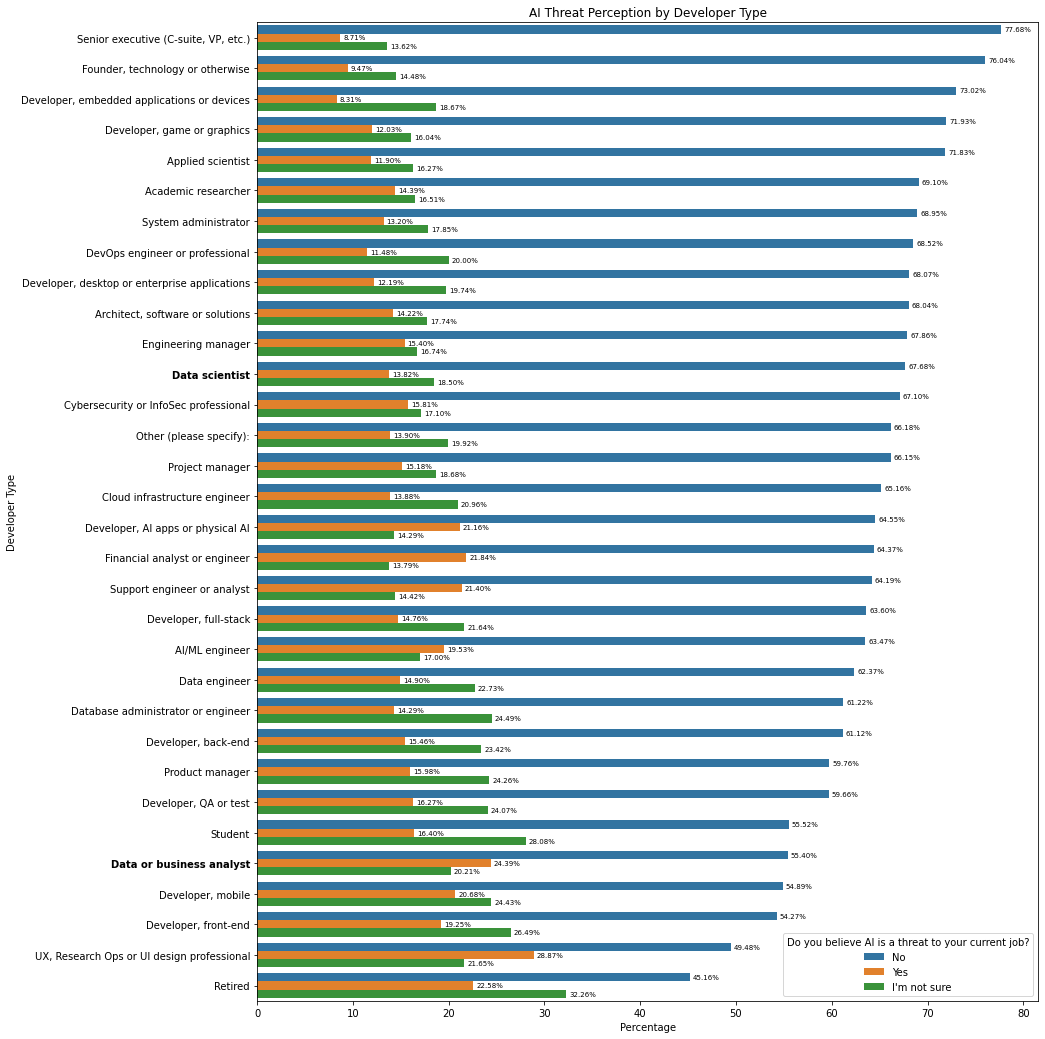

In [25]:
graph_AIThreat_percentages(df_results)

The graph above shows that 24.4% of data and business analysts believe that AI is a threat to their job while only 13.8% of data scientists believe AI is a threat to their job. Most respondents do not believe that AI is a threat to their job. Over half of respondents in all categories except "UX, Research Ops or UI design professional" and "Retired" believe that AI is not a threat to their job.

Now graph the survey results that have been filtered to only include responses from people who are currently employed, working as independent contractors or freelancers, or are self-employed. The assumption here is that people in these categories of employment will have a better sense of the impact of AI than those who are not employed, retired, or students. I want to see if there are any significant differences.

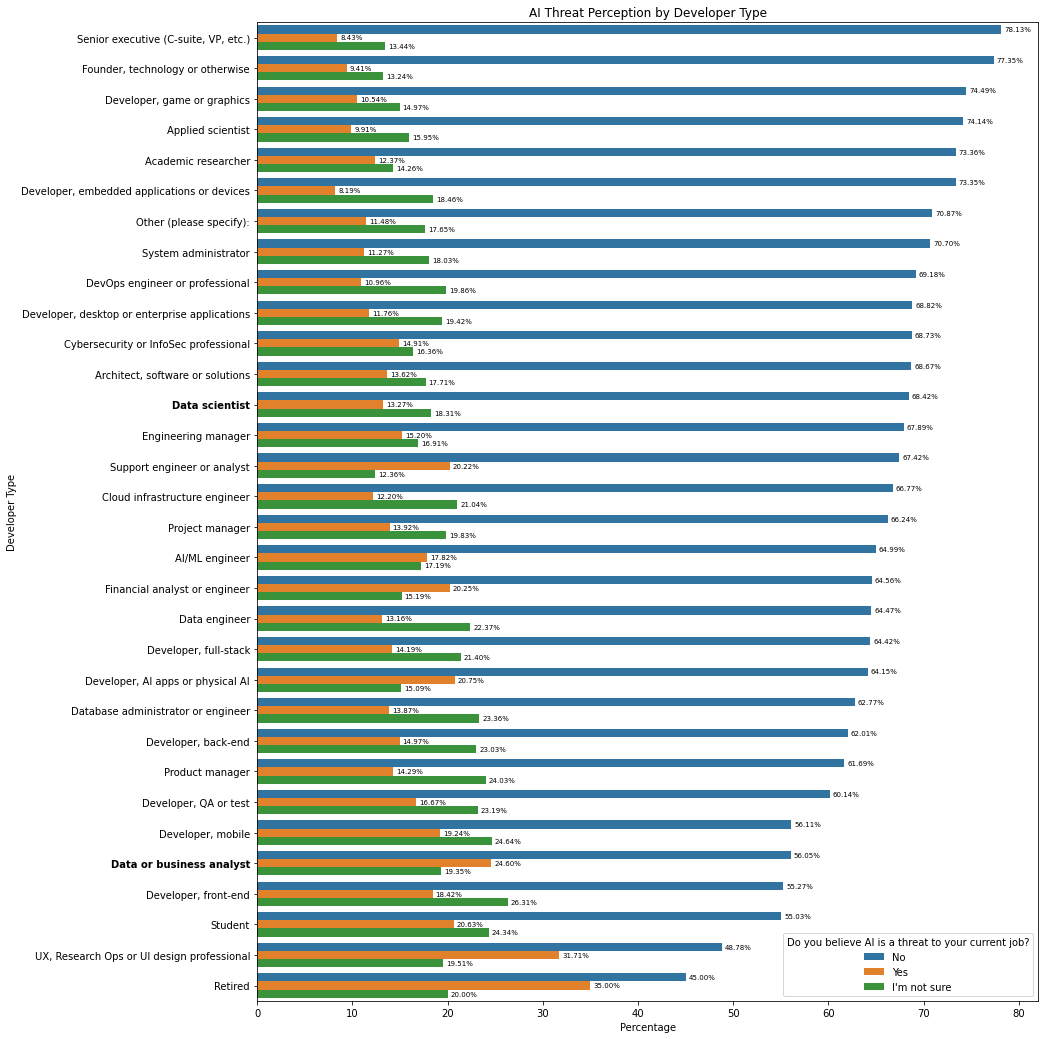

In [26]:
graph_AIThreat_percentages(df_results_employed)

There is little change in the graph for the roles of data scientist and data or business analyst. Some other jobs saw slightly larger changes of a couple of percentage points between the two graphs.

### Question 2: What factors are correlated with the perceived or real threat?

In answering this question I will only include responses from data scientists and data or business analysts as those are the jobs I am focusing on.

Evaluate the model and inspect the feature importances to see which features have the biggest impat on a developer's perception of the threat of AI.

In [27]:
#Check for overfitting using accuracy scores
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print('Accuracy on training data: ' + str(train_accuracy))
print('Accuracy on testing data: ' + str(test_accuracy))

Accuracy on training data: 0.646484375
Accuracy on testing data: 0.6374269005847953


The model is not very accurate, and changing the max_depth has little effect on the accuracy. This is reflective of the low correlation between features and the target variable.

In [28]:
#Check precision and recall
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.64      1.00      0.78       108
           2       1.00      0.03      0.06        33

    accuracy                           0.64       171
   macro avg       0.55      0.34      0.28       171
weighted avg       0.59      0.64      0.50       171



C:\Users\sky_a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sky_a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sky_a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model does not perform well.  

Answers to the target question "Do you believe AI is a threat to your current job?" were encoded as follows:  

0: I'm not sure  
1: No  
2: Yes  

In the test set, 108 (63%) of the samples in the test set were "No" answers, 33 (31%) were "Yes" answers, and 30 (28%) were "I'm not sure." The model has perfect precision but very low recall for "Yes" answers, indicating that the model frequently misidentifies "Yes" answers, but when it does label a sample as having a "Yes" answer, it is always correct. The model has poor precision but perfect recall for "No" answers, indicating that it is biased towards labeling samples as having a "No" answer. The model never predicted that a sample was in the "I'm not sure" category, despite 28% of the samples falling into that category.

Now look at the permutation importances of the features.

In [29]:
feature_names = list(X_test.columns)
result = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42)
sorted_idx = result.importances_mean.argsort()[::-1]
print("Permutation Importance:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {result.importances_mean[i]:.4f} +/- {result.importances_std[i]:.4f}")

Permutation Importance:
LearnCodeAI_Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies: 0.0058 +/- 0.0000
Country_Sri Lanka: 0.0058 +/- 0.0000
DevType_Data scientist: 0.0047 +/- 0.0023
AISent_Unfavorable: 0.0012 +/- 0.0023
AISent_Very unfavorable: 0.0000 +/- 0.0000
Country_Costa Rica: 0.0000 +/- 0.0000
Country_Bangladesh: 0.0000 +/- 0.0000
Country_Belgium: 0.0000 +/- 0.0000
Country_Brazil: 0.0000 +/- 0.0000
Country_Bulgaria: 0.0000 +/- 0.0000
Country_Burundi: 0.0000 +/- 0.0000
Country_Cameroon: 0.0000 +/- 0.0000
Country_Canada: 0.0000 +/- 0.0000
Country_Chile: 0.0000 +/- 0.0000
Country_Colombia: 0.0000 +/- 0.0000
Country_Congo, Republic of the...: 0.0000 +/- 0.0000
Country_Czech Republic: 0.0000 +/- 0.0000
Country_Cyprus: 0.0000 +/- 0.0000
Country_Australia: 0.0000 +/- 0.0000
Country_Denmark: 0.0000 +/- 0.0000
Country_Ecuador: 0.0000 +/- 0.0000
Country_Egypt: 0.0000 +/- 0.0000
Country_Ethiopia: 0.0000 +/- 0.0000
Country_Finland: 0.0000 +/- 0.0000
Countr

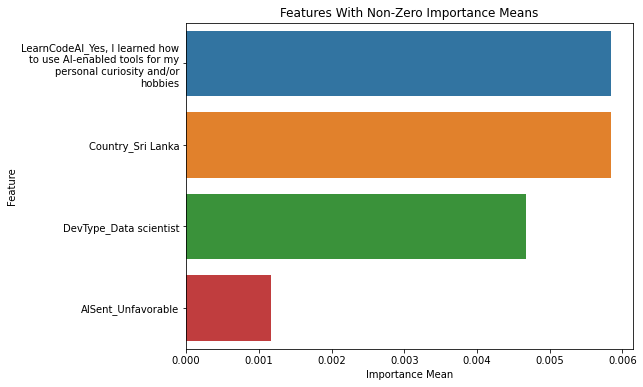

In [69]:
importances=np.column_stack((feature_names,result.importances_mean))
sorted_importances = pd.DataFrame(importances[sorted_idx], columns=["Feature","Importance Mean"])
sorted_importances['Importance Mean'] = pd.to_numeric(sorted_importances['Importance Mean'])
#remove rows that have an importance mean of 0
sorted_importances = sorted_importances[sorted_importances['Importance Mean'] != 0]
plt.figure(figsize=(8,6))
ax = sns.barplot(data=sorted_importances, x='Importance Mean', y='Feature');
#wrap labels
labels = [textwrap.fill(label.get_text(), width=30) for label in ax.get_yticklabels()]
ax.set_yticklabels(labels, rotation=0)
plt.title('Features With Non-Zero Importance Means');

None of the features have a high permutation importance, but lets take a closer look at one of the features that has the highest permutation importance.

One of the feature with the highest importance comes from the question "Did you spend time in the last year learning AI programming or AI-enabled tooling on your own or at work?" As we can see in the correlation matrix shown previoiusly, the correlation between the response "Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies" and the target question was 0.019497. Despite having the highest permutation importance, it is not the most correlated with the target according to the correlation matrix, but that may be because it has a non-linear relationship with the target. Since the value from the correlation matrix is positive, we know that having learned how to use AI-enabled tools for personal curiosity and/or hobbies slightly increases the odds that the person believes that AI is a threat to their current job.

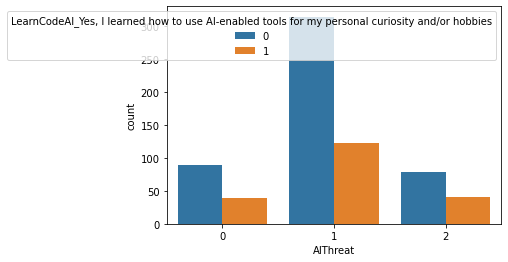

In [30]:
sns.countplot(data=model_data_encoded, x='AIThreat', hue='LearnCodeAI_Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies');

The graph above confirms that the feature does not do a good job of predicting the target.

### Question 3: What skills will be most necessary for data scientists and data analysts in the future?

Use word clouds to visualize the responses to the survey question below. Make separate word clouds for data scientists and for data or business analysts in order to see if there is a difference in the skills that will be needed for these jobs.  
  
Looking ahead 3–5 years, what skills do you believe will
remain valuable for developers even as AI tools become
more capable? Please describe.

In [31]:
#First get the question name for the question
question_names[question_names['question'] == 'Looking ahead 3–5 years, what skills do you believe will remain valuable for developers even as AI tools become more capable? Please describe.']

,qname,question
138,AIOpen,"Looking ahead 3–5 years, what skills do you be..."


In [32]:
def make_word_cloud(devtype, question):
    """ Creates and returns a WordCloud object using only responses to the specified question for the specified DevType."""
    #filter for just the dev type desired
    df_results_filtered = df_results[df_results['DevType'] == devtype]
    words = df_results_filtered[question].dropna().reset_index(drop=True)
    word_string = ' '.join(words)
    wc = WordCloud(relative_scaling=1).generate(word_string)#set relative_scaling to 1 so only word frequencies are used and word rank is not considered. While the word cloud doesn't look as good, this is a more honest representation of the words because words that are twice as frequent are twice as big.
    return wc

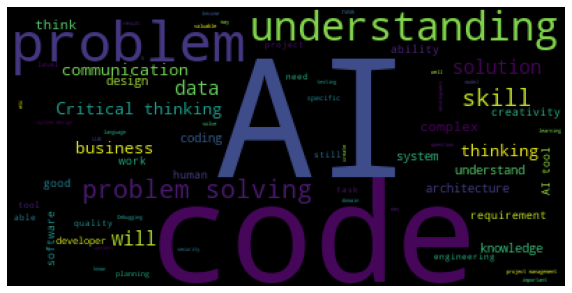

In [33]:
wc_scientists = make_word_cloud('Data scientist', 'AIOpen')
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc_scientists);

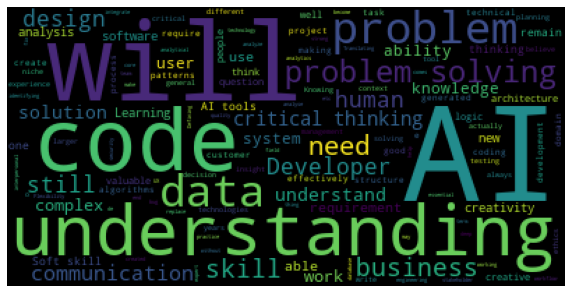

In [34]:
wc_analysts = make_word_cloud('Data or business analyst', 'AIOpen')
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc_analysts);

The word clouds for both data scientists and data or business analysts are very similar. The top two words in both are "AI" and "code." Other top phrases shared by both word clouds include "understanding," "data," "problem," "problem solving," "skill," and "business."

Now look at the percentage of responses that contain the most common phrases to get a sense of the extent to which professionals in the field agree or disagree on the skills that will be needed for their jobs in the next 3-5 years.

In [35]:
def graph_phrase_percentages(wc, devtype, question, num_phrases):
    """Creates a bar graph of the percentages of responses to the specified question that contain each of the 
    num_phrases most frequent phrases. Only responses from the specified developer type will be included."""
    top_phrases = list(wc.words_.keys())[0:num_phrases]
    #calculate the percentage of responses containing each phrase
    percentages = {}
    df_results_filtered = df_results[df_results['DevType'] == devtype]
    df_results_filtered = df_results_filtered[question].dropna().reset_index(drop=True)
    num_responses = df_results_filtered.count()
    for phrase in top_phrases:
        phrase_pattern = r'\b' + phrase + r'\b' #make sure the phrase is not a substring of another word (ex. when the phrase is "ai", don't count "rain")
        count = df_results_filtered.str.contains(phrase_pattern, flags=re.IGNORECASE, regex=True).sum() #This will count phrases that are substrings of other phrases (ex. counting all the rows with "problem" when "problem solving" is also a phrase).
        percentages[phrase] = count / num_responses * 100
    percentages_df = pd.DataFrame(list(percentages.items()), columns=["Phrase", "Percent of Responses Containing the Phrase"])
    sns.barplot(data=percentages_df, x='Percent of Responses Containing the Phrase', y='Phrase', color='skyblue');

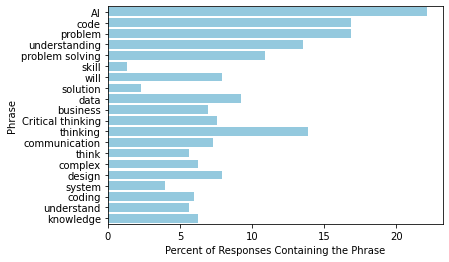

In [36]:
graph_phrase_percentages(wc_scientists, 'Data scientist', 'AIOpen', 20)

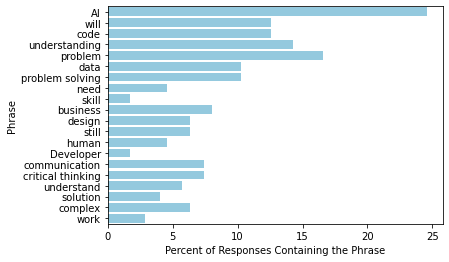

In [37]:
graph_phrase_percentages(wc_analysts, 'Data or business analyst', 'AIOpen', 20)

Now look at a sampling of the responses that contain the top phrases to see the context in which they are used.

In [38]:
def get_sample_responses_with_top_phrases(wc, devtype, question, num_phrases):
    """Prints the num_phrases most frequent phrases from WordCloud wc along with a random sample of 10 responses 
    containing each phrase. The specified DevType and question should match what the WordCloud is based on."""
    top_phrases = list(wc.words_.keys())[0:num_phrases]
    df_results_filtered = df_results[df_results['DevType'] == devtype]
    df_results_filtered = df_results_filtered[question].dropna().reset_index(drop=True)
    max_colwidth = pd.get_option('display.max_colwidth')
    pd.set_option('display.max_colwidth', None) #prevent the text from being truncated
    for phrase in top_phrases:
        print(phrase)
        phrase_pattern = r'\b' + phrase + r'\b'
        df_has_phrase = df_results_filtered[df_results_filtered.str.contains(phrase_pattern, flags=re.IGNORECASE, regex=True)].reset_index(drop=True)
        sample_size = min(10, len(df_has_phrase))
        #print(df_has_phrase)
        print(df_has_phrase.sample(n=sample_size, random_state=7).to_string(index=False))
        print('\n-----')
    pd.set_option('display.max_colwidth', max_colwidth) #set the max column width back to what it was before the function was called

In [39]:
get_sample_responses_with_top_phrases(wc_scientists, 'Data scientist', 'AIOpen', 10)

AI
I think that developers who actually know how to code without the assistance of AI tools will make themselves very valuable and future-proof, no matter their experience level or career level. I believe firmly that AI is a bubble that's going to burst within the next few years simply due to the unsustainable costs of data centers and such. I think AI tools will always be around in the future as paid enterprise tools, but I don't think they're going to be available for free to the general public for much longer. As such, I think people who can develop software without AI tools will be in the best position to succeed and stay employed.
                                                                                                                                                                                                                                                                                                                                                                    

In [40]:
get_sample_responses_with_top_phrases(wc_analysts, 'Data or business analyst', 'AIOpen', 10)

AI
                                                                                                                                                                                                                                                                                                                                                                                                                 Generative ai
Understanding code bases and conventions. I think LLMs will continue to struggle with larger code bases as they can't handle all that context. Understanding the business domain will be critical, as well as being able to use that understanding to guide technology decisions. I don't believe AI will be able to get an understanding of the business domain and use that to make good decisions for a given organization.
                                                                                                                                                                       

Based on this, it seems that opinions are divided on the utility of AI, with some people saying it's useless while others say it is a useful tool that people in their role should know how to use well. None of the sampled answers indicate that the responders think AI will replace them in the next 3-5 years. The people working in these jobs generally agree that top skills that will remain valuable in the next 3-5 years are being able to understand and debug code; understand, define, and solve problems; and think critically.  

Note that using sentiment analysis on the responses could yield more insights than what is possible with just reading a sampling of the relevant responses.